# Exploring Security Practices in Infrastructure as Code: An Empirical Study of Azure Terraform Configurations

In [21]:
import matplotlib.pyplot as plt
import numpy as np
#plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.family"] = "Arial"
plt.rcParams['figure.dpi'] = 300

In [22]:
RESULTS_FILE = "./csv/azure_results_tfsec.csv"
POLICIES_FILE = "./csv/azure_policies_tfsec.csv"
DATASET = "./csv/azure_dataset_filtered-tfsec.csv"
METRICS_FILE = "./csv/azure_dataset_metrics.csv"

Retrieve the list of the 121 selected policies and their mapped categories.
We also print the policies list to use in the checkov_looper.py Python script.

In [23]:
categories = {}
policies = {}
p_names = {}
with open(POLICIES_FILE, 'r') as f:
    f.readline()
    policies_rows = f.readlines()
    for row in policies_rows:
        s_row = row.split(',')
        if s_row[4] == "TRUE":
            policy_id = s_row[6]
            policy_name = s_row[2]
            policy_description = s_row[3]
            policy_category = s_row[5].strip('\n')
            if policy_category == "":
                policy_category = "Uncategorized"

            policies[policy_id] = policy_description
            categories[policy_id] = policy_category
            p_names[policy_id] = policy_name

In [24]:
print("CHECK_LIST = " + ",".join(policies))

CHECK_LIST = AVD-AZU-0033,AVD-AZU-0051,AVD-AZU-0047,AVD-AZU-0008,AVD-AZU-0007,AVD-AZU-0011,AVD-AZU-0030,AVD-AZU-0013,AVD-AZU-0043,AVD-AZU-0041,AVD-AZU-0040,AVD-AZU-0042,AVD-AZU-0002,AVD-AZU-0003,AVD-AZU-0005,AVD-AZU-0004,AVD-AZU-0001,AVD-AZU-0006,AVD-AZU-0039,AVD-AZU-0038,AVD-AZU-0037,AVD-AZU-0036,AVD-AZU-0028,AVD-AZU-0027,AVD-AZU-0020,AVD-AZU-0022,AVD-AZU-0029,AVD-AZU-0024,AVD-AZU-0019,AVD-AZU-0026


## RQ1: Category Mapping Distribution

In [25]:
categories_count = {}
for policy in policies:
    categories_count[categories.get(policy, "Uncategorized")] = categories_count.get(categories.get(policy, "Uncategorized"), 0) + 1

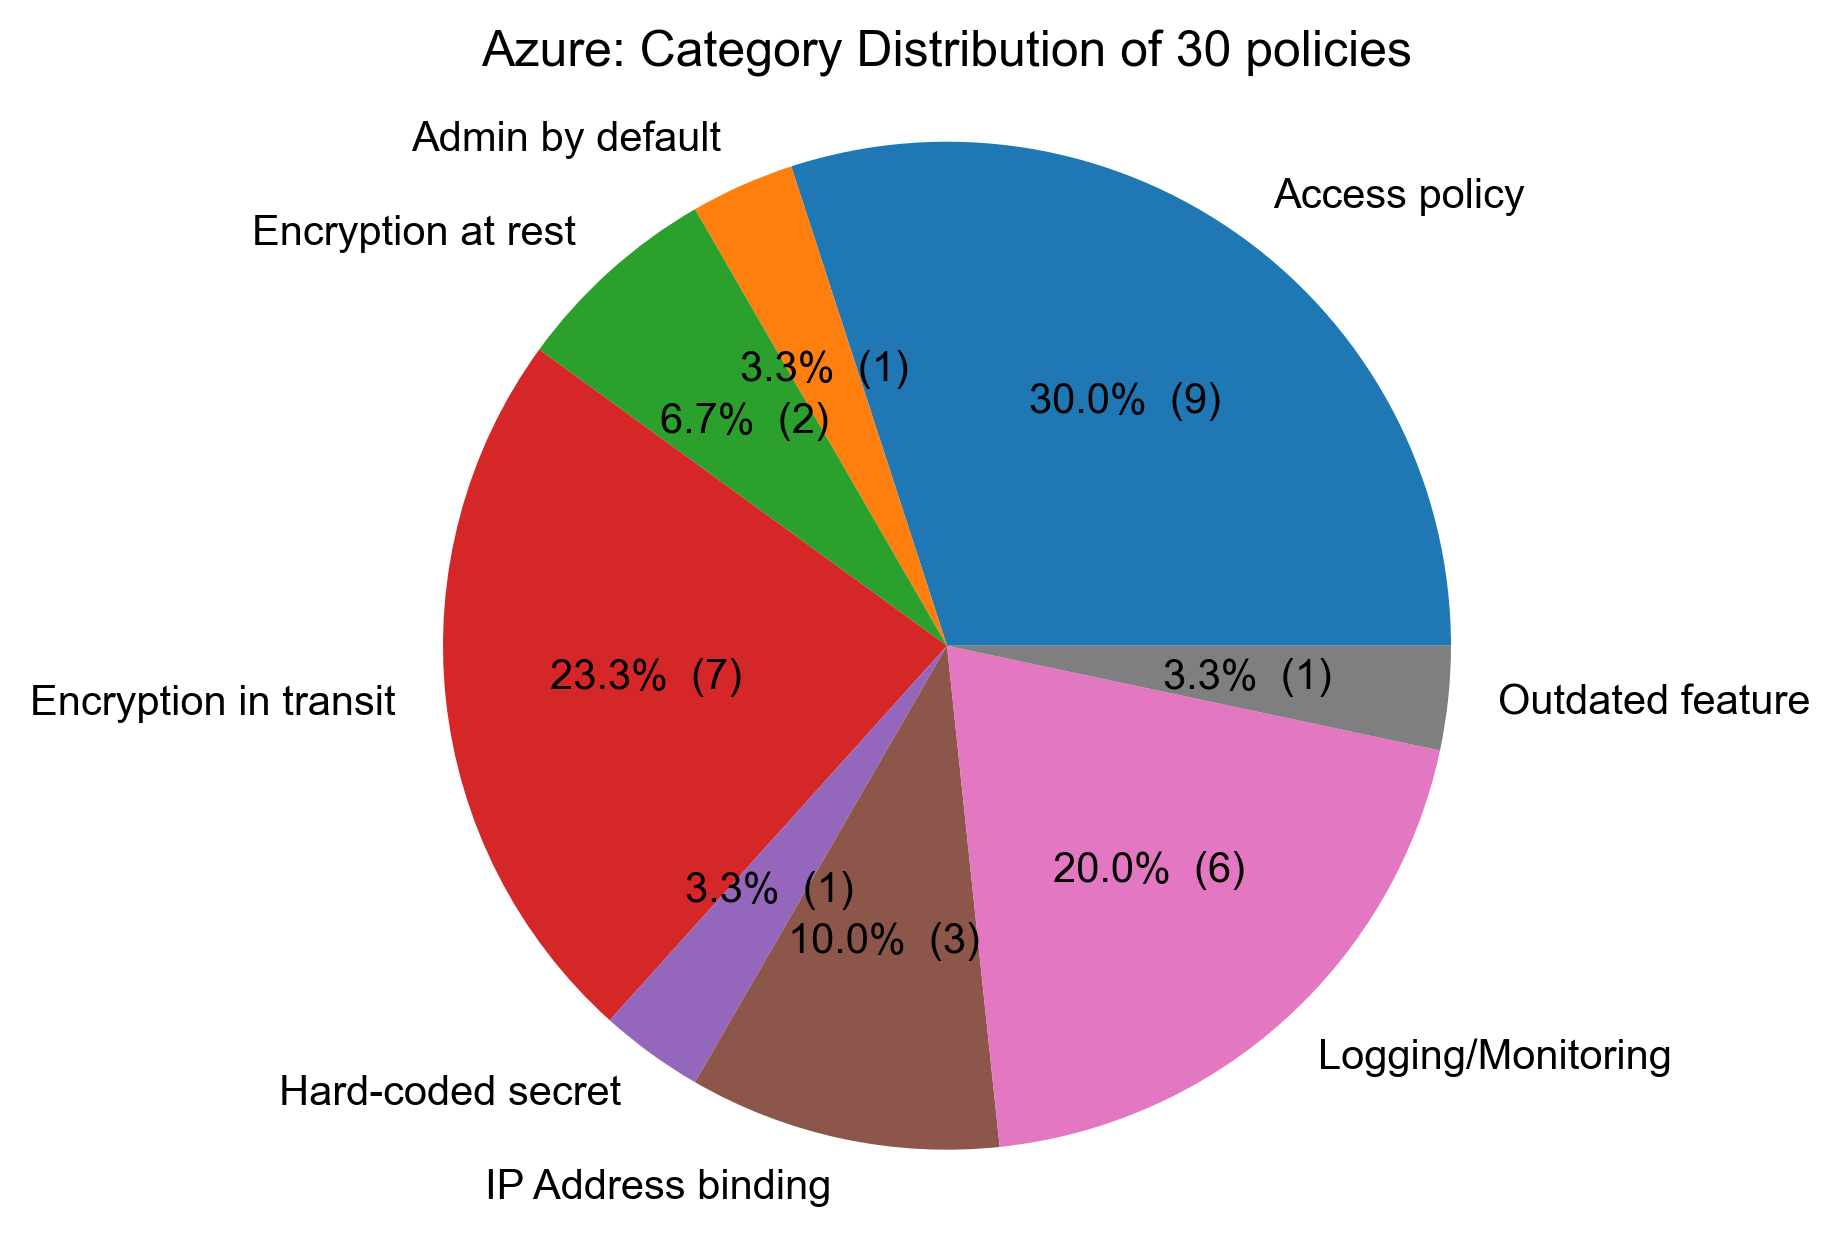

In [26]:
labels2 = sorted([*categories_count.keys()])
sizes2 = [categories_count[k] for k in labels2]
fig2, ax2 = plt.subplots()
ax2.pie(sizes2, labels=labels2, autopct=lambda p : '{:.1f}%  ({:,.0f})'.format(p,p * sum(sizes2)/100))
ax2.axis('equal')
ax2.set(title="Azure: Category Distribution of {} policies".format(len(policies)))
plt.show()

## Results analysis

Load the repository list of our dataset and the checkov results

In [27]:
with open(DATASET, 'r') as f:
    f.readline()
    tmp_repo_names = f.readlines()
repo_names = [k.strip("\n") for k in tmp_repo_names]

In [28]:
with open(RESULTS_FILE, 'r') as f:
    f.readline()
    repo_results = f.readlines()

Aggregate the results per category. Ensures all policies in the results are categorized (have been selected and mapped to a category).

In [29]:
passed_count_dict = {}
failed_count_dict = {}
categories_passed_counts = {}
categories_failed_counts = {}
uncategorized_policies = {}
repo_results_list = []
for row in repo_results:
    columns = row.split(',')
    repo_name = columns[0]
    if repo_name in repo_names:
        passed_policies = columns[3].split(';')
        failed_policies = columns[4].split(';')
        repo_results_list.append([len(passed_policies), len(failed_policies)])

        for policy in passed_policies:
            if len(policy) > 0:
                if categories.get(policy, "Uncategorized") == "Uncategorized":
                    uncategorized_policies[policy] = True
                    continue
                categories_passed_counts[categories.get(policy, "Uncategorized")] = categories_passed_counts.get(categories.get(policy, "Uncategorized"), 0) + 1
                passed_count_dict[policy] = passed_count_dict.get(policy, 0) + 1
                
        for policy in failed_policies:
            if len(policy) > 0:
                if categories.get(policy, "Uncategorized") == "Uncategorized":
                    uncategorized_policies[policy] = True
                    continue
                categories_failed_counts[categories.get(policy, "Uncategorized")] = categories_failed_counts.get(categories.get(policy, "Uncategorized"), 0) + 1
                failed_count_dict[policy] = failed_count_dict.get(policy, 0) + 1
                

total_count = {}
for policy in passed_count_dict:
    total_count[policy] = total_count.get(policy, 0) + passed_count_dict[policy]
for policy in failed_count_dict:
    total_count[policy] = total_count.get(policy, 0) + failed_count_dict[policy]
                    
print("Uncategorized policies: {}".format([*uncategorized_policies.keys()]))
print("Total number of passed policies: {}".format(sum(passed_count_dict.values())))
print("Total number of failed policies: {}".format(sum(failed_count_dict.values())))
print("Median number of checks per policy: {}".format(np.median([*total_count.values()])))
print("Average number of checks per policy: {}".format(np.average([*total_count.values()])))
print("Skewness of checks per policy: {}".format((np.average([*total_count.values()])-np.median([*total_count.values()]))/np.std([*total_count.values()])))

Uncategorized policies: ['AVD-AWS-0099', 'AVD-AWS-0124', 'AVD-AWS-0107', 'AVD-AWS-0029', 'AVD-AZU-0048', 'AVD-DIG-0002', 'AVD-DIG-0004', 'AVD-GCP-0037', 'AVD-GCP-0043', 'AVD-GCP-0036', 'AVD-GCP-0027', 'AVD-GCP-0032', 'AVD-OPNSTK-0001', 'AVD-OPNSTK-0005', 'AVD-OPNSTK-0003', 'AVD-AWS-0131', 'AVD-AWS-0028', 'AVD-AWS-0101', 'AVD-AWS-0104', 'AVD-AWS-0164', 'AVD-AWS-0178', 'AVD-AWS-0053', 'AVD-AWS-0057', 'AVD-AZU-0050', 'AVD-GCP-0045', 'AVD-GCP-0041', 'AVD-GCP-0044', 'AVD-GCP-0030', 'AVD-GCP-0031', 'AVD-GCP-0033', 'AVD-AZU-0012', 'AVD-AZU-0016', 'AVD-AZU-0010', 'AVD-AZU-0034', 'AVD-AZU-0014', 'AVD-AZU-0015', 'AVD-AZU-0017', 'AVD-AZU-0009', 'AVD-AWS-0129', 'AVD-GCP-0008', 'AVD-GCP-0009', 'AVD-GCP-0007', 'AVD-GCP-0006', 'AVD-GCP-0011', 'AVD-GCP-0003', 'AVD-GCP-0002', 'AVD-GCP-0001', 'AVD-GCP-0026', 'AVD-AZU-0021', 'AVD-AWS-0130', 'AVD-GCP-0029', 'AVD-GCP-0066', 'AVD-GCP-0024', 'AVD-GCP-0015', 'AVD-AZU-0025', 'AVD-GCP-0035', 'AVD-GCP-0012', 'AVD-AWS-0091', 'AVD-AWS-0092', 'AVD-AWS-0094', 'AVD-A

In [30]:
nb_of_checks = []
for i in repo_results_list:
    nb_of_checks.append(i[0]+i[1])
rate_list = []
for i in repo_results_list:
    rate_list.append(100*i[0]/(i[0]+i[1]))
    
print("Median number of checks per repo: {}".format(np.median(nb_of_checks)))
print("Average number of checks per repo: {}".format(np.average(nb_of_checks)))
print("Skewness of checks per repo: {}".format((np.average(nb_of_checks)-np.median(nb_of_checks))/np.std(nb_of_checks)))
print("\n")
print("Median pass rate per repo: {}".format(np.median(rate_list)))
print("Average pass rate per repo: {}".format(np.average(rate_list)))

Median number of checks per repo: 8.5
Average number of checks per repo: 34.161764705882355
Skewness of checks per repo: 0.3453979412743668


Median pass rate per repo: 50.0
Average pass rate per repo: 53.216235705318134


### Generate the Paper Full Table with the results

In [31]:
inv_cat = {}
for k, v in categories.items():
    inv_cat[v] = inv_cat.get(v, []) + [k]
tp = ""
for cat in inv_cat:
    p = inv_cat[cat]
    tp = tp + "\multirow{" + str(len(p)) + "}{*}{" + cat + "}"
    for i in p:
        if total_count.get(i,0) != 0:
            tp = tp + " & " + policies[i] + " & " + str(total_count.get(i,0)) + " & " + str(passed_count_dict.get(i,0)) + " & " + str(failed_count_dict.get(i,0)) + " & " + str(passed_count_dict.get(i,0)/total_count.get(i,0)*100)[:5] +"\\\\ \n"
        else:
            tp = tp + " & " + policies[i] + " & " + str(total_count.get(i,0)) + " & " + str(passed_count_dict.get(i,0)) + " & " + str(failed_count_dict.get(i,0)) + " & " +"\\\\ \n"
    tp = tp + "\hline \n"
tp = tp.replace("_", "\_")
print(tp)

\multirow{6}{*}{Logging/Monitoring} & Ensure log profile captures all activities & 4 & 0 & 4 & 0.0\\ 
 & Ensure AKS logging to Azure Monitoring is Configured & 42 & 18 & 24 & 42.85\\ 
 & No threat detections are set & 1 & 1 & 0 & 100.0\\ 
 & Auditing should be enabled on Azure SQL Databases & 18 & 5 & 13 & 27.77\\ 
 & Ensure server parameter 'log\_checkpoints' is set to 'ON' for PostgreSQL Database Server & 10 & 1 & 9 & 10.0\\ 
 & Ensure server parameter 'log\_connections' is set to 'ON' for PostgreSQL Database Server & 10 & 1 & 9 & 10.0\\ 
\hline 
\multirow{3}{*}{IP Address binding} & An outbound network security rule allows traffic to /0. & 199 & 156 & 43 & 78.39\\ 
 & An inbound network security rule allows traffic from /0. & 245 & 109 & 136 & 44.48\\ 
 & Ensure AKS has an API Server Authorized IP Ranges enabled & 38 & 7 & 31 & 18.42\\ 
\hline 
\multirow{7}{*}{Encryption in transit} & Storage accounts should be configured to only accept transfers that are over secure connections & 1

## RQ2/RQ3 : Category Pass/Fail Rate

In [32]:
policies_rate = {}
for policy in policies:
    if passed_count_dict.get(policy, 0) + failed_count_dict.get(policy, 0) > 0:
        policies_rate[policy] = passed_count_dict.get(policy, 0) / (passed_count_dict.get(policy, 0) + failed_count_dict.get(policy, 0))

categories_rates = {}
for category in [*categories.values()]:
    categories_rates[category] = categories_passed_counts[category] / (categories_passed_counts[category] + categories_failed_counts.get(category, 0))

#categories_rates = {}
#for policy in policies_rate:
 #   categories_rates[categories[policy]] = categories_rates.get(categories[policy], []) + [policies_rate[policy]]
#for category in categories_rates:
 #   categories_rates[category] = np.average(categories_rates.get(category, []))
print(categories_rates)
print(categories_failed_counts)

{'Logging/Monitoring': 0.3058823529411765, 'IP Address binding': 0.5643153526970954, 'Encryption in transit': 0.6232558139534884, 'Access policy': 0.4497354497354497, 'Admin by default': 1.0, 'Outdated feature': 0.18181818181818182, 'Encryption at rest': 0.9444444444444444, 'Hard-coded secret': 1.0}
{'IP Address binding': 210, 'Encryption in transit': 162, 'Access policy': 208, 'Outdated feature': 18, 'Logging/Monitoring': 59, 'Encryption at rest': 2}


In [33]:
import pickle
with open('./azure_categories_rates_tfsec.pkl', 'wb') as f:
    pickle.dump(categories_rates, f)

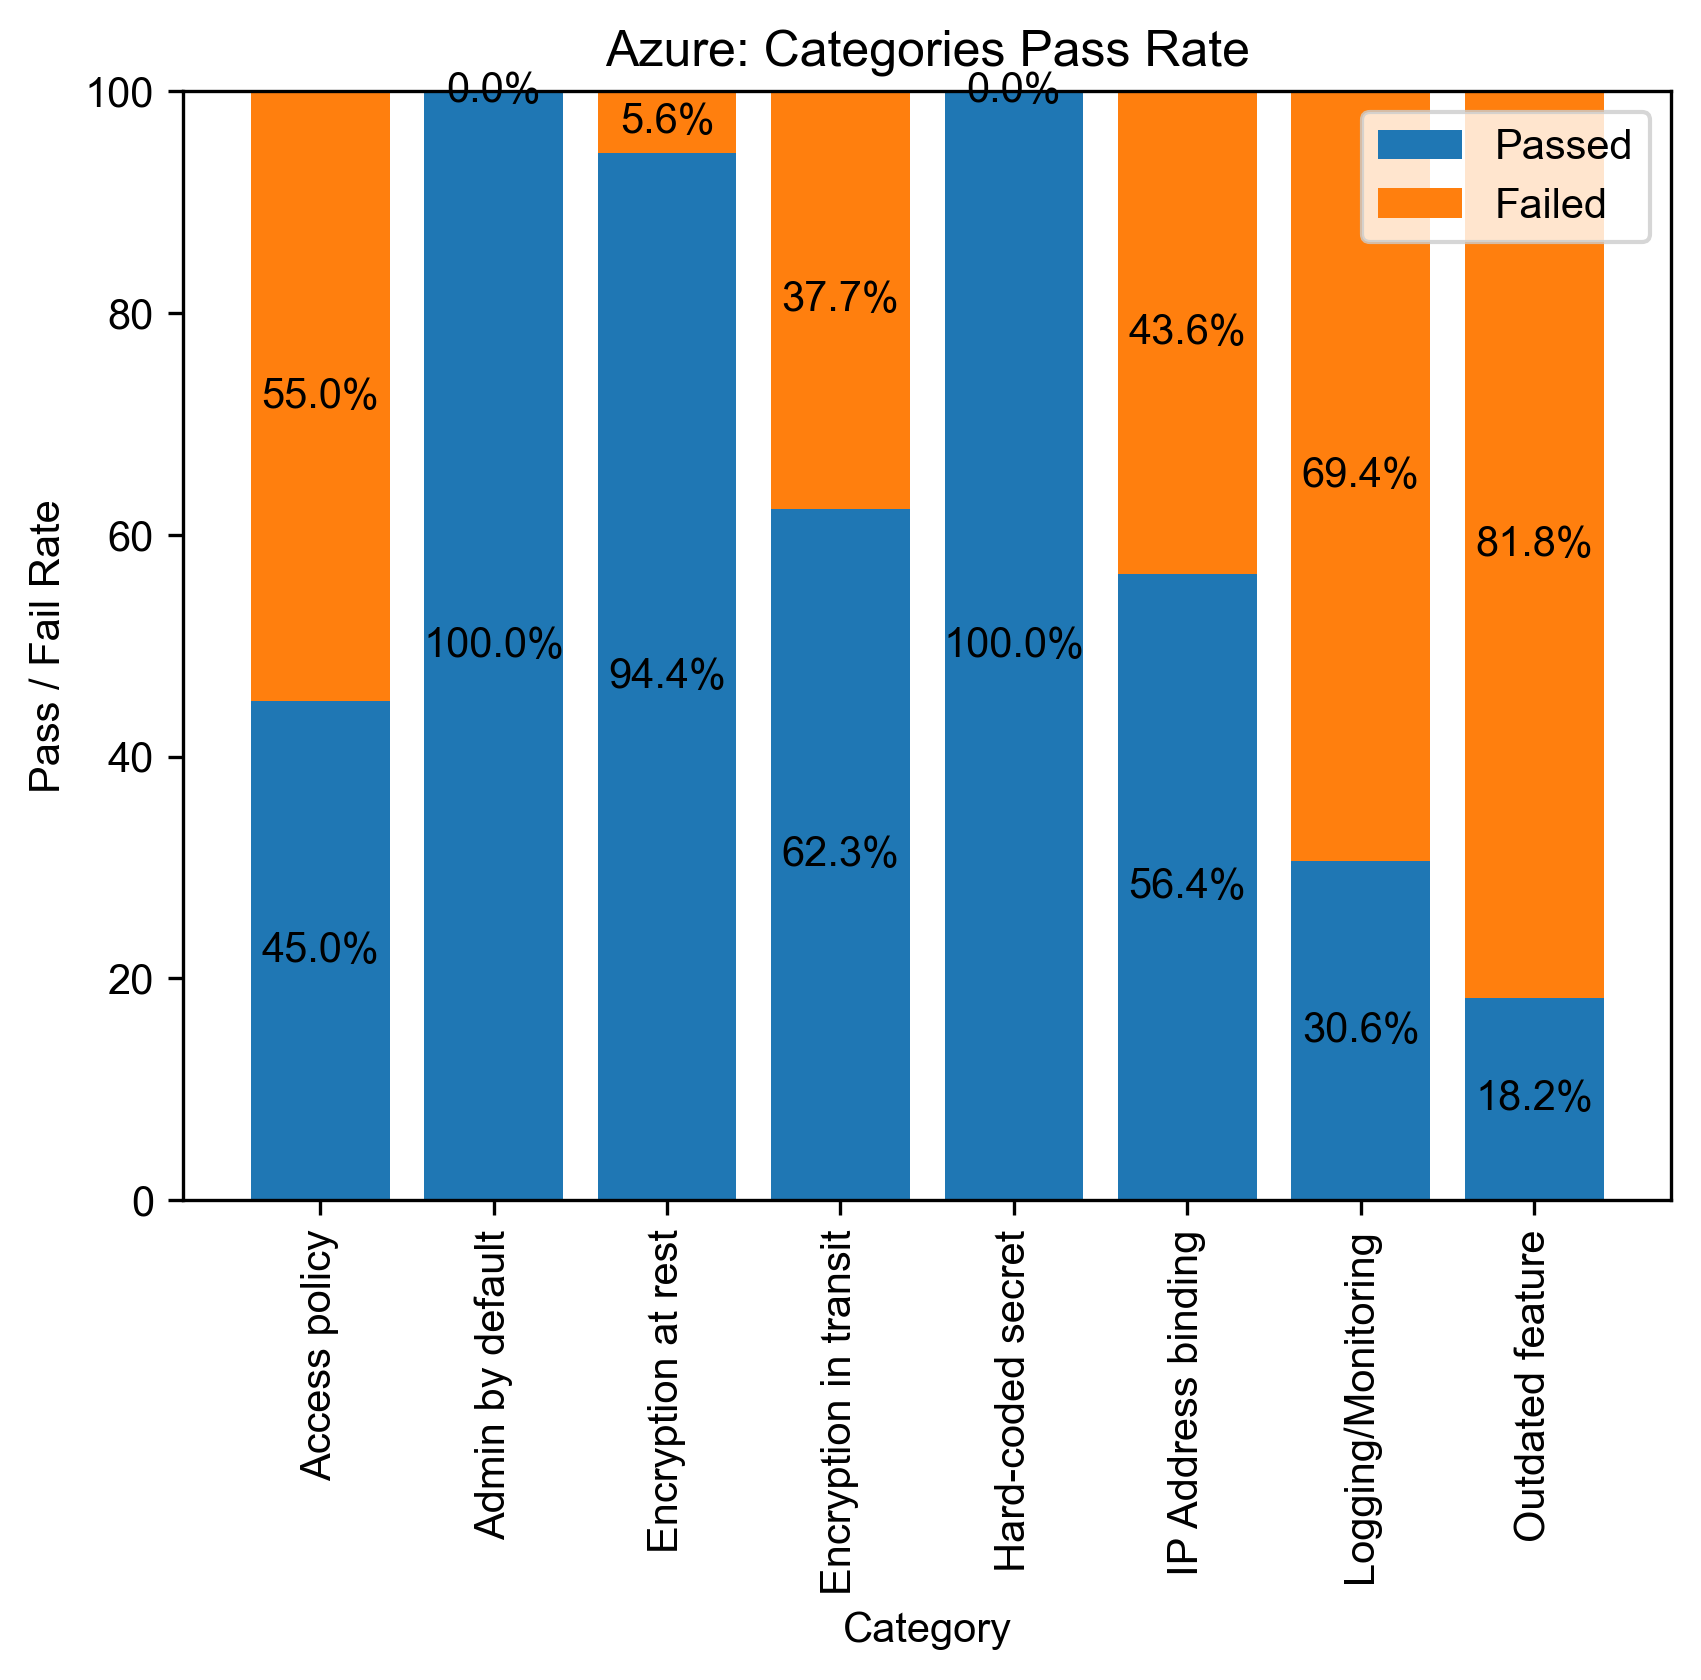

In [34]:
fig7, ax7 = plt.subplots()
x = sorted([*categories_rates.keys()])
y1 = [100*categories_rates[k] for k in x]
y2 = [100-k for k in y1]
bc1 = ax7.bar(x, y1)
bc2 = ax7.bar(x, y2, bottom=y1)
ax7.bar_label(bc1, labels=['{0:.1f}%'.format(e) for e in y1], label_type='center')
ax7.bar_label(bc2, labels=['{0:.1f}%'.format(e) for e in y2], label_type='center')
ax7.set(xlabel="Category", ylabel="Pass / Fail Rate", title="Azure: Categories Pass Rate")
ax7.legend(["Passed", "Failed"])
plt.xticks(rotation=90)
plt.show()

## RQ2/RQ3 : Best and Worst Pass/Fail Policies

In [35]:
policies_rate = {}
for policy in policies:
    if passed_count_dict.get(policy, 0) + failed_count_dict.get(policy, 0) > 50:
        policies_rate[policy] = passed_count_dict.get(policy, 0) / (passed_count_dict.get(policy, 0) + failed_count_dict.get(policy, 0))

print("Averate Pass/Fail Rate: {}".format(np.average([*policies_rate.values()])))
        
sorted_policies_rates = sorted(policies_rate, key=policies_rate.get, reverse=True)
print("Best 5 Pass / Fail Rate Policies")
for policy in sorted_policies_rates[:6]:
    print("{} - {} - {}".format(policy, (passed_count_dict.get(policy, 0) + failed_count_dict.get(policy, 0)), policies_rate[policy]))
print("Worst 5 Pass / Fail Rate Policies")
for policy in reversed(sorted_policies_rates[-7:]):
    print("{} - {} - {}".format(policy, (passed_count_dict.get(policy, 0) + failed_count_dict.get(policy, 0)), policies_rate[policy]))

Averate Pass/Fail Rate: 0.6395927490361337
Best 5 Pass / Fail Rate Policies
AVD-AZU-0008 - 168 - 1.0
AVD-AZU-0037 - 140 - 1.0
AVD-AZU-0007 - 56 - 0.8928571428571429
AVD-AZU-0051 - 199 - 0.7839195979899497
AVD-AZU-0039 - 89 - 0.550561797752809
AVD-AZU-0047 - 245 - 0.4448979591836735
Worst 5 Pass / Fail Rate Policies
AVD-AZU-0013 - 65 - 0.12307692307692308
AVD-AZU-0011 - 168 - 0.32142857142857145
AVD-AZU-0047 - 245 - 0.4448979591836735
AVD-AZU-0039 - 89 - 0.550561797752809
AVD-AZU-0051 - 199 - 0.7839195979899497
AVD-AZU-0007 - 56 - 0.8928571428571429
AVD-AZU-0037 - 140 - 1.0


Print Average number of test per category

In [36]:
policies_nb_runs = {}
for policy in policies:
    policies_nb_runs[policy] = passed_count_dict.get(policy, 0) + failed_count_dict.get(policy, 0)
mean_category_runs = {}
for policy in policies_nb_runs:
    mean_category_runs[categories.get(policy, "Uncategorized")] = mean_category_runs.get(categories.get(policy, "Uncategorized"), []) + [policies_nb_runs[policy]]

for category in mean_category_runs:
    print(str(category) +" "+ str(np.sum(mean_category_runs[category])))
    mean_category_runs[category] = np.average(mean_category_runs[category])
print(mean_category_runs)

Logging/Monitoring 85
IP Address binding 482
Encryption in transit 430
Access policy 378
Admin by default 11
Outdated feature 22
Encryption at rest 36
Hard-coded secret 140
{'Logging/Monitoring': 14.166666666666666, 'IP Address binding': 160.66666666666666, 'Encryption in transit': 61.42857142857143, 'Access policy': 42.0, 'Admin by default': 11.0, 'Outdated feature': 22.0, 'Encryption at rest': 18.0, 'Hard-coded secret': 140.0}


In [37]:
stars = []
forks = []
contrib = []
with open(METRICS_FILE, 'r') as f:
    #f.readline()
    rows = f.readlines()
    for item in rows:
        column = item.split(',')
        if column[0] in repo_names:
            stars.append(int(column[1]))
            forks.append(int(column[2]))
            contrib.append(int(column[3].strip("\n")))

In [38]:
print("Average stars: {}".format(np.average(stars)))
print("Median stars: {}".format(np.median(stars)))
print("Average forks: {}".format(np.average(forks)))
print("Median forks: {}".format(np.median(forks)))
print("Average conrtib: {}".format(np.average(contrib)))
print("Median contrib: {}".format(np.median(contrib)))

Average stars: 50.93382352941177
Median stars: 6.5
Average forks: 56.06617647058823
Median forks: 3.0
Average conrtib: 9.301470588235293
Median contrib: 4.0
